Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#show top 5 records
df=pd.read_csv("data/data.csv")
print(df.head(5))
print(df.shape)

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
(1000, 8)


2.2 Dataset information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

3. Data Checks to perform
Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column

In [3]:
#check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
#check duplicates and datatypes
print(df.duplicated().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#checking unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [6]:
#checking statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


exploring data

In [7]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(f"numerical columns are {numerical_features}")
print(f"categorical features are {categorical_features}")

numerical columns are ['math_score', 'reading_score', 'writing_score']
categorical features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']



3.8 Adding columns for "Total Score" and "Average"

In [9]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [10]:
a=df[df.math_score==100].reading_score.count()
b=df[df.writing_score==100].reading_score.count()
c=df[df.reading_score==100].reading_score.count()
print(f"No of students with full marks in math,write and read is {a},{b},{c}")

No of students with full marks in math,write and read is 7,14,17


In [11]:
a=df[df.math_score<20].reading_score.count()
b=df[df.writing_score<20].reading_score.count()
c=df[df.reading_score <20].reading_score.count()
print(f"students with <20 in math,write and read are {a},{b},{c}")

students with <20 in math,write and read are 4,3,1


In [12]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


4. Exploring Data ( Visualization )
4.1 Visualize average score distribution to make some conclusion.

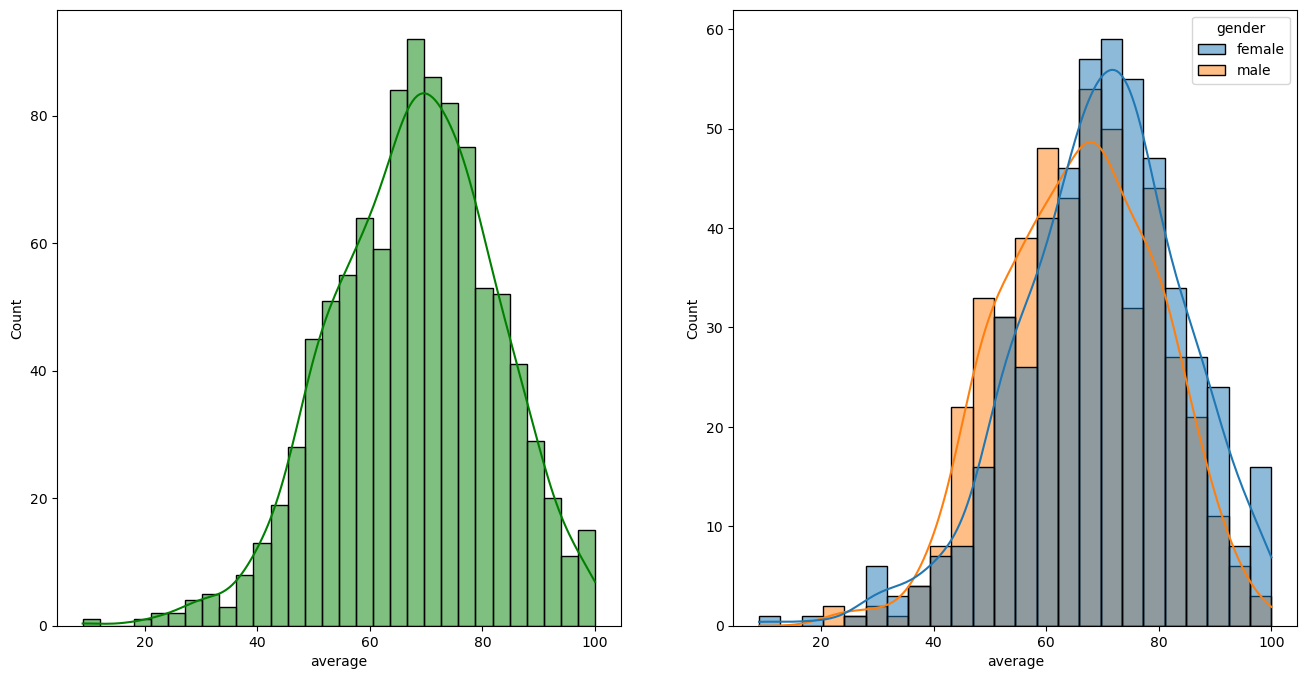

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

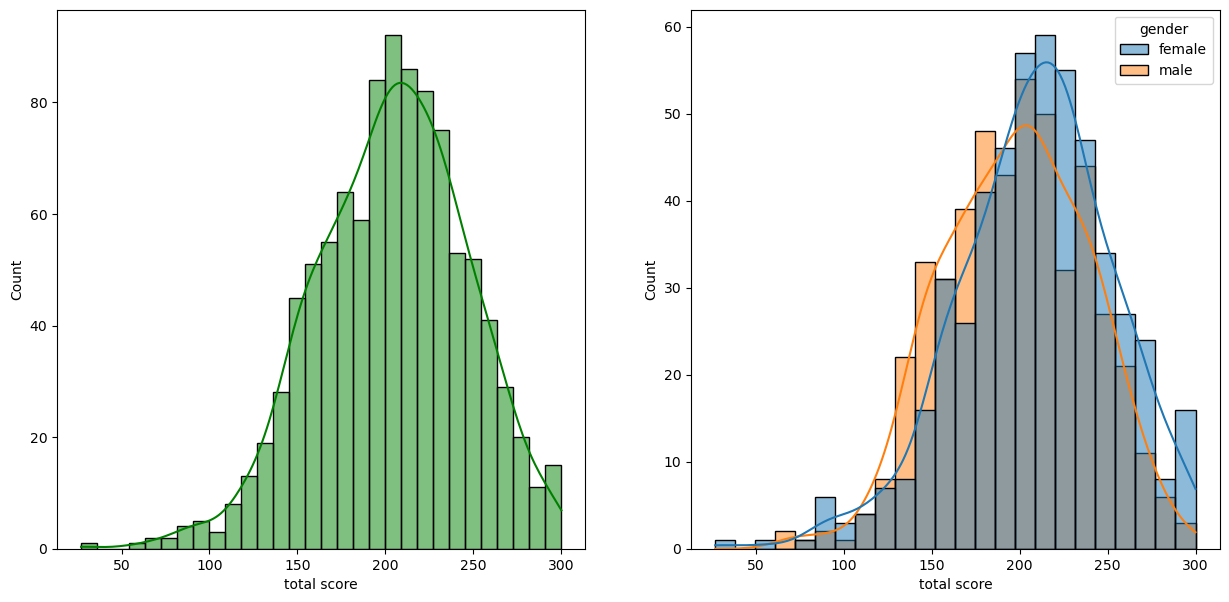

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

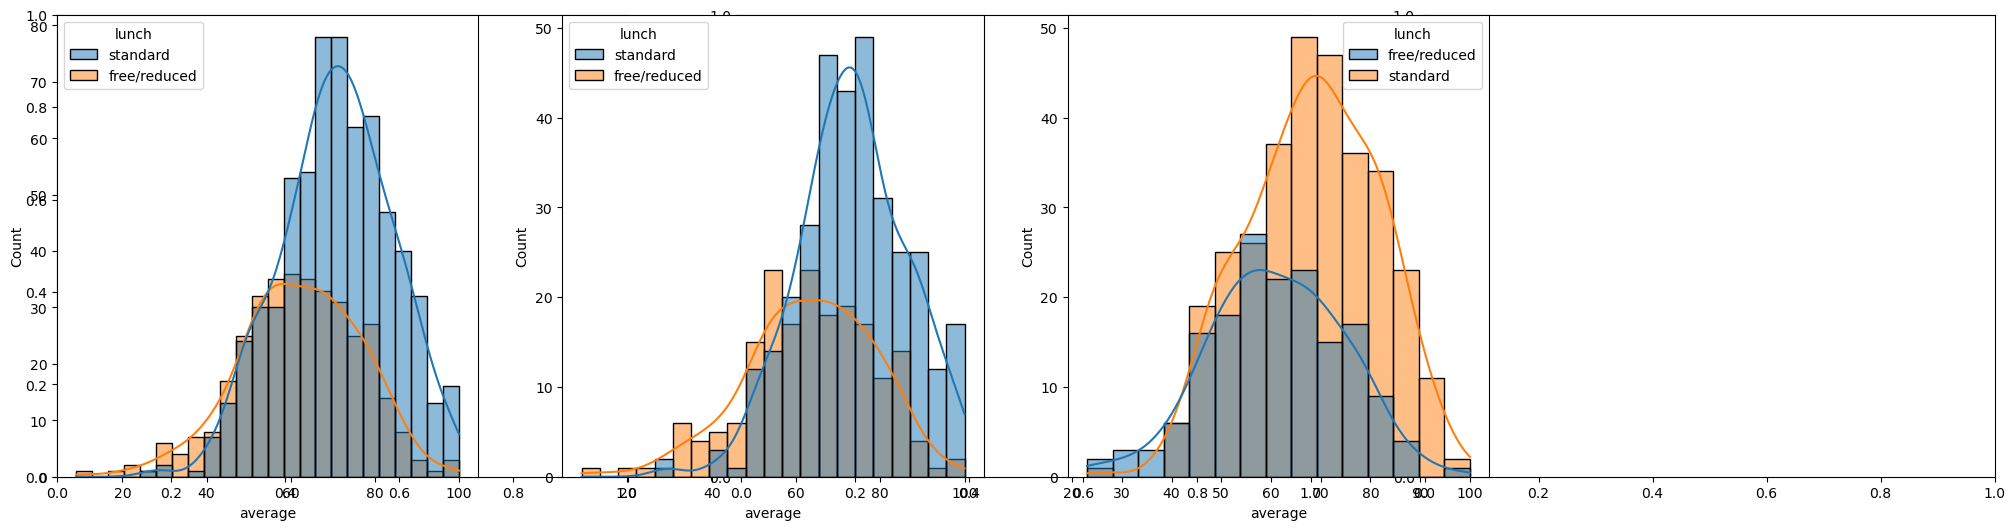

In [15]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

# Insights

# Standard lunch helps perform well in exams.
# Standard lunch helps perform well in exams be it a male or a female.



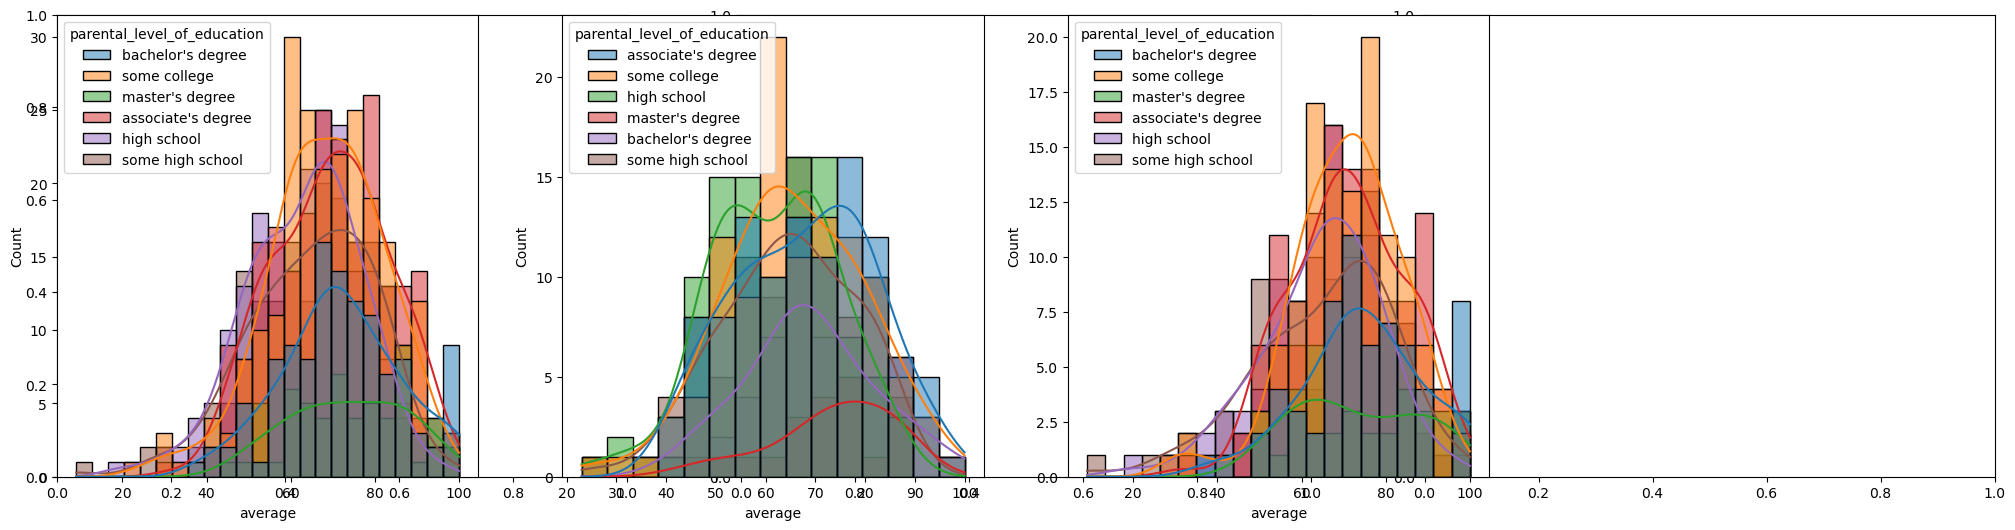

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()


Insights

    In general parent's education don't help student perform well in exam.
    2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
    3rd plot we can see there is no effect of parent's education on female students.


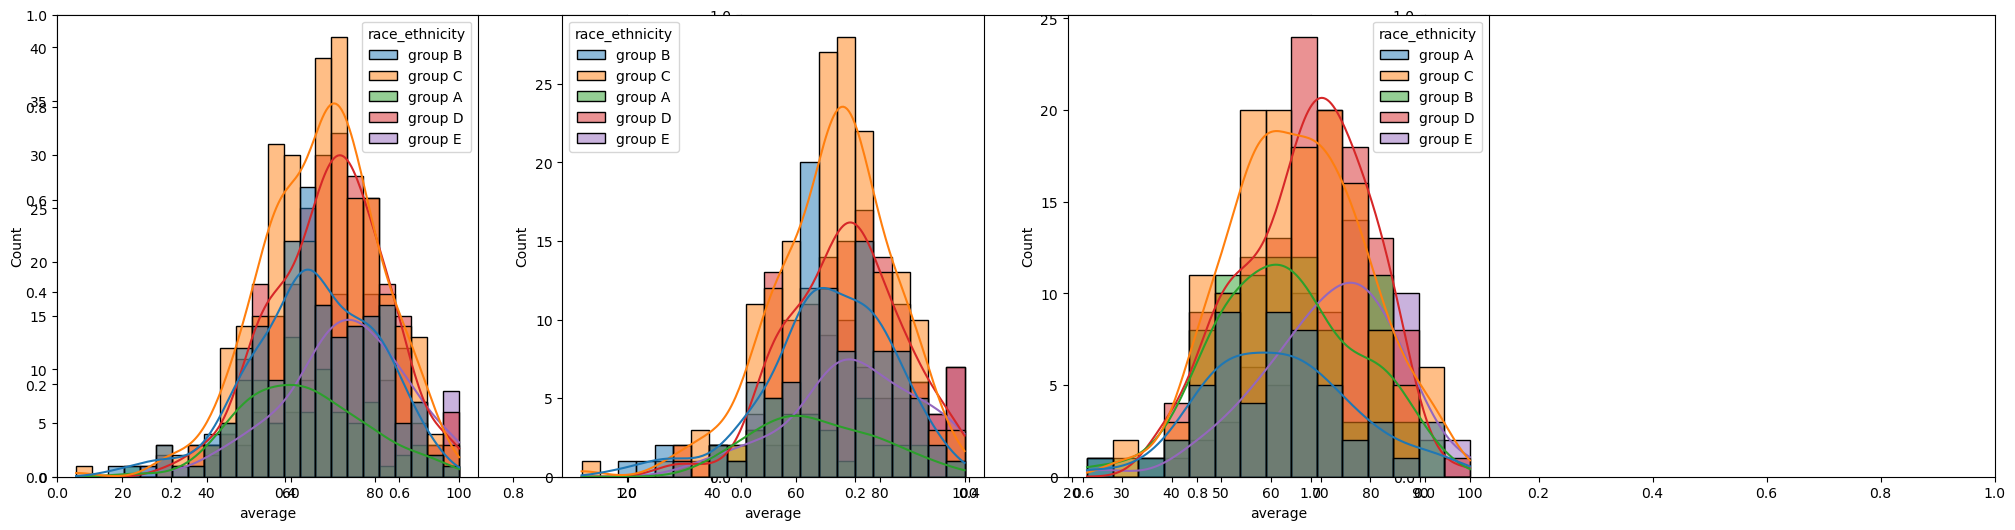

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights

    Students of group A and group B tends to perform poorly in exam.
    Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


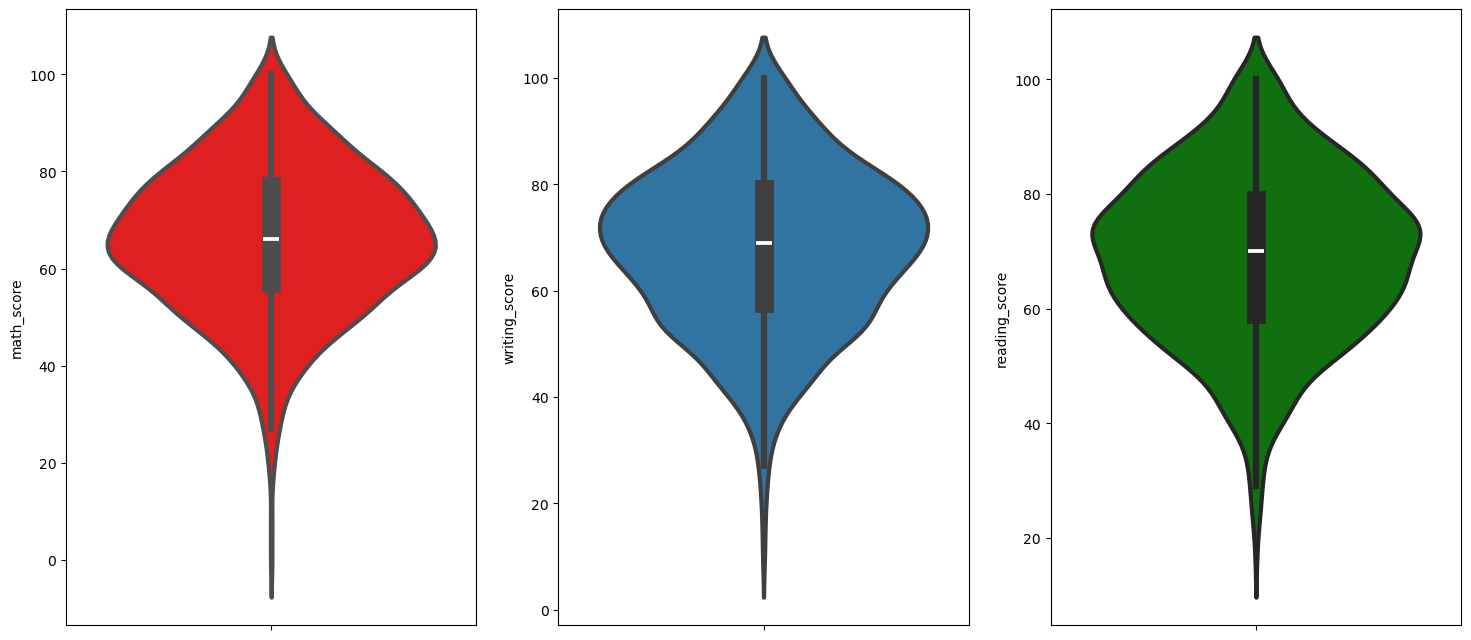

In [18]:
fig,axis=plt.subplots(1,3,figsize=(18,8))
plt.subplot(1,3,1)
sns.violinplot(data=df,y='math_score',linewidth=3,color='red')
plt.subplot(1,3,2)
sns.violinplot(y='writing_score',data=df,linewidth=3)
plt.subplot(1,3,3)
sns.violinplot(y='reading_score',data=df,linewidth=3,color='green')
plt.show()


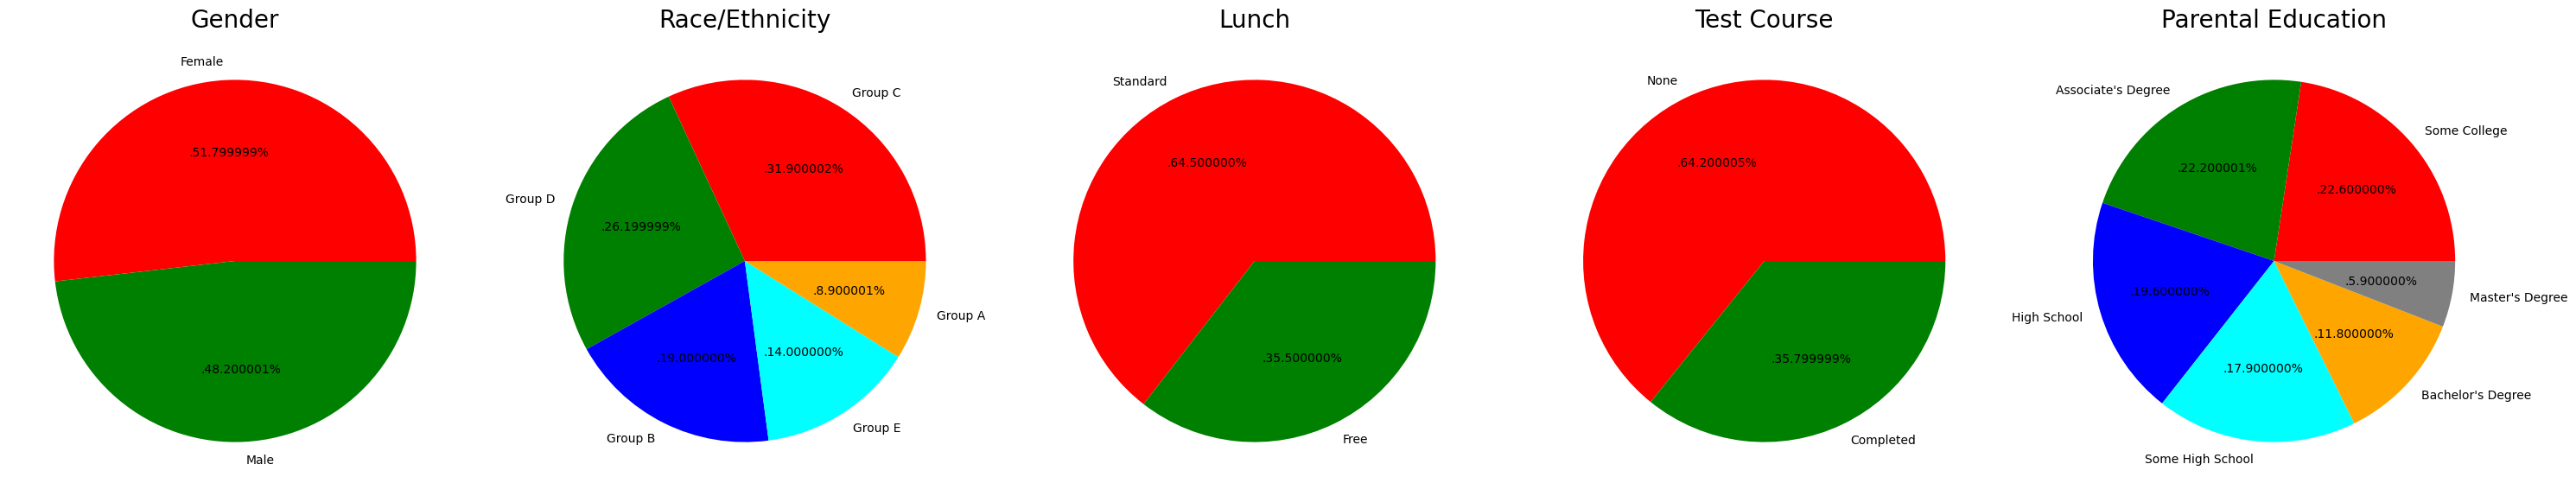

In [19]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

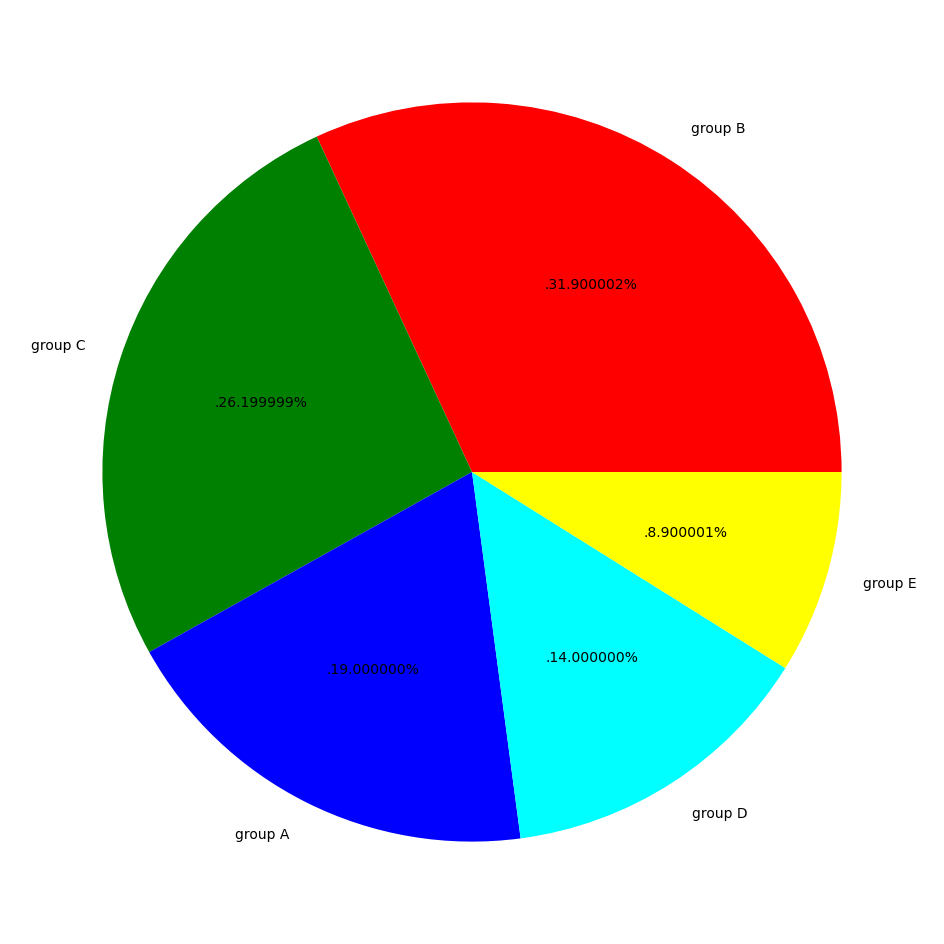

In [20]:
labels=df.race_ethnicity.unique()
colors=['red','green','blue','cyan','yellow']
size=df.race_ethnicity.value_counts()
plt.pie(size,labels=labels,colors=colors,autopct='.%1f%%')
plt.show()

In [21]:
df.head(6)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333


In [22]:
d1=df.groupby('gender')[['average','math_score']].mean()
d1=d1.T
d1

gender,female,male
average,69.569498,65.837483
math_score,63.633205,68.728216


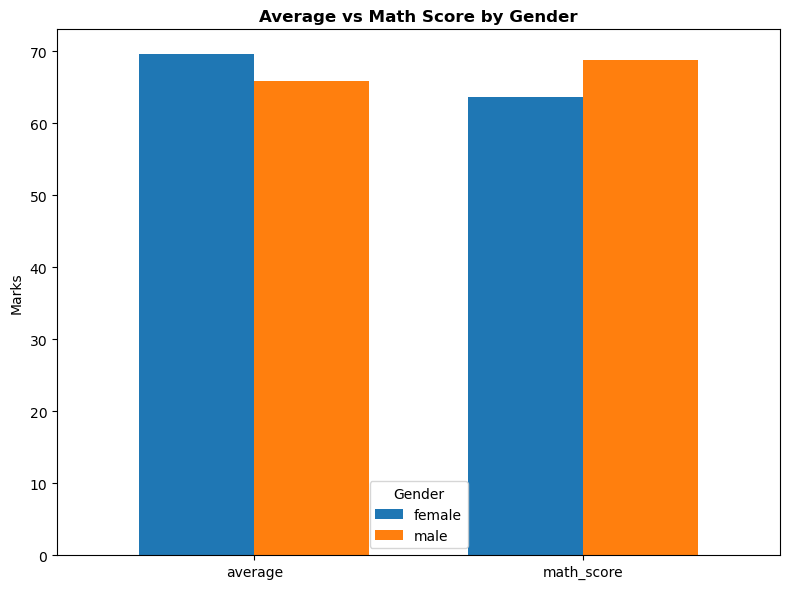

In [23]:
# Step 3: Plot
d1.plot(kind='bar', figsize=(8, 6), width=0.7)

plt.title("Average vs Math Score by Gender", fontweight='bold')
plt.ylabel("Marks")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Insights

    On an average females have a better overall score than men.
    whereas males have scored higher in Maths.


4.4.2 RACE/EHNICITY COLUMN

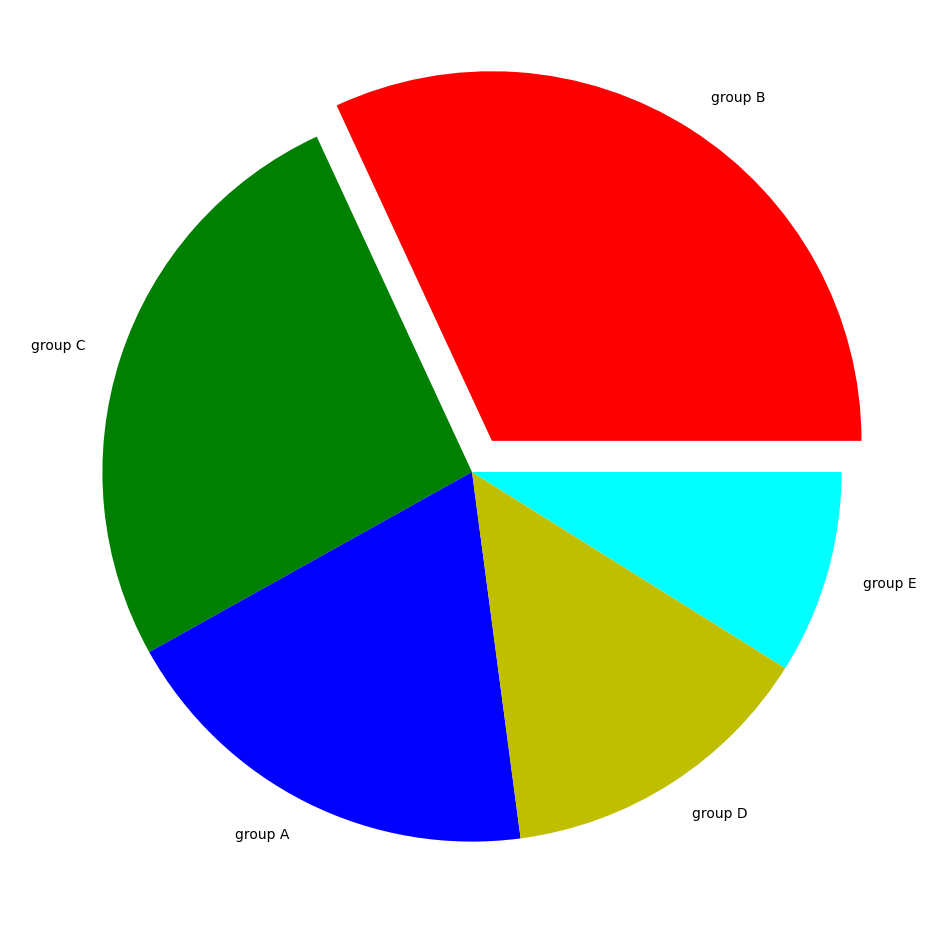

In [24]:
labels=df.race_ethnicity.unique()
colors=['r','g','b','y','cyan']

plt.pie(df.race_ethnicity.value_counts(),labels=labels,colors=colors,explode=[0.1,0,0,0,0])
plt.show()

In [27]:
#how each ethnicity fare as far as total marks averge and math average
dataframe=df.groupby('race_ethnicity')[['math_score','reading_score','writing_score']].mean()
dataframe


,math_score,reading_score,writing_score
race_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


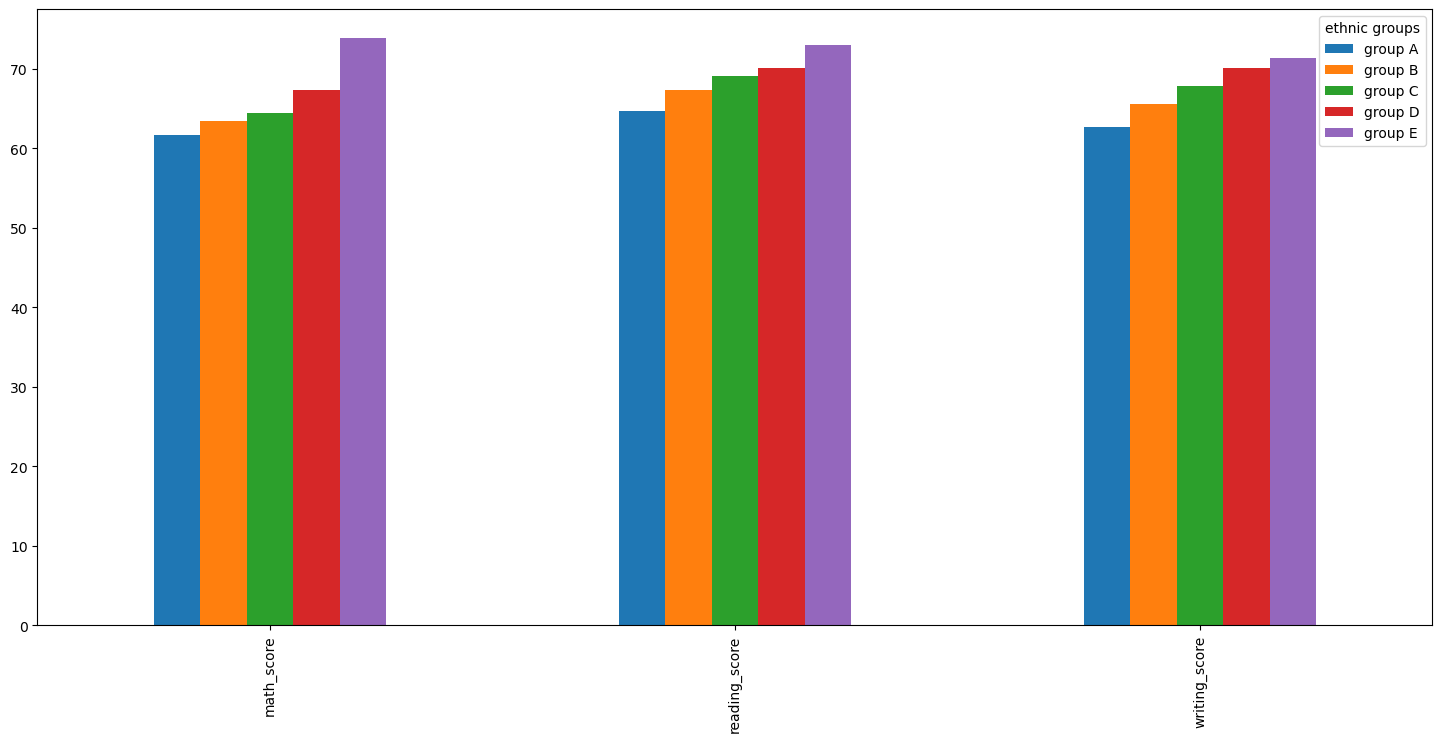

In [31]:
dataframe.T.plot(kind='bar',figsize=(18,8))
plt.legend(title='ethnic groups')
plt.show()

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

    What is educational background of student's parent ?
    Is parental education has any impact on student's performance ?


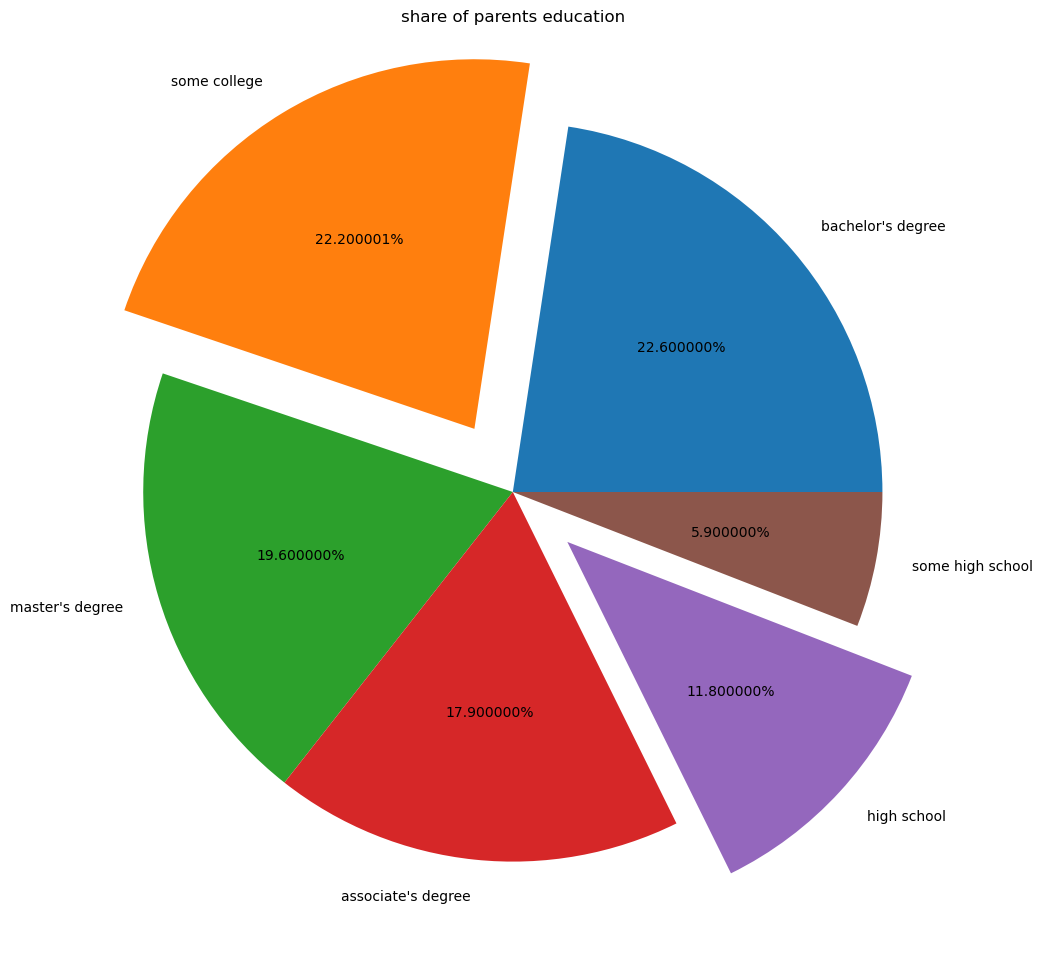

In [39]:
labels=df.parental_level_of_education.unique()
plt.pie(df.parental_level_of_education.value_counts(),labels=labels,explode=[0,0.2,0,0,0.2,0],autopct='%1f%%')
plt.title('share of parents education')
plt.show()

In [49]:
parent_frame=df.groupby('parental_level_of_education')[['math_score','writing_score','reading_score']].mean()
parent_frame=parent_frame.T
parent_frame

parental_level_of_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math_score,67.882883,69.389831,62.137755,69.745763,67.128319,63.497207
writing_score,69.896396,73.381356,62.448980,75.677966,68.840708,64.888268
reading_score,70.927928,73.000000,64.704082,75.372881,69.460177,66.938547


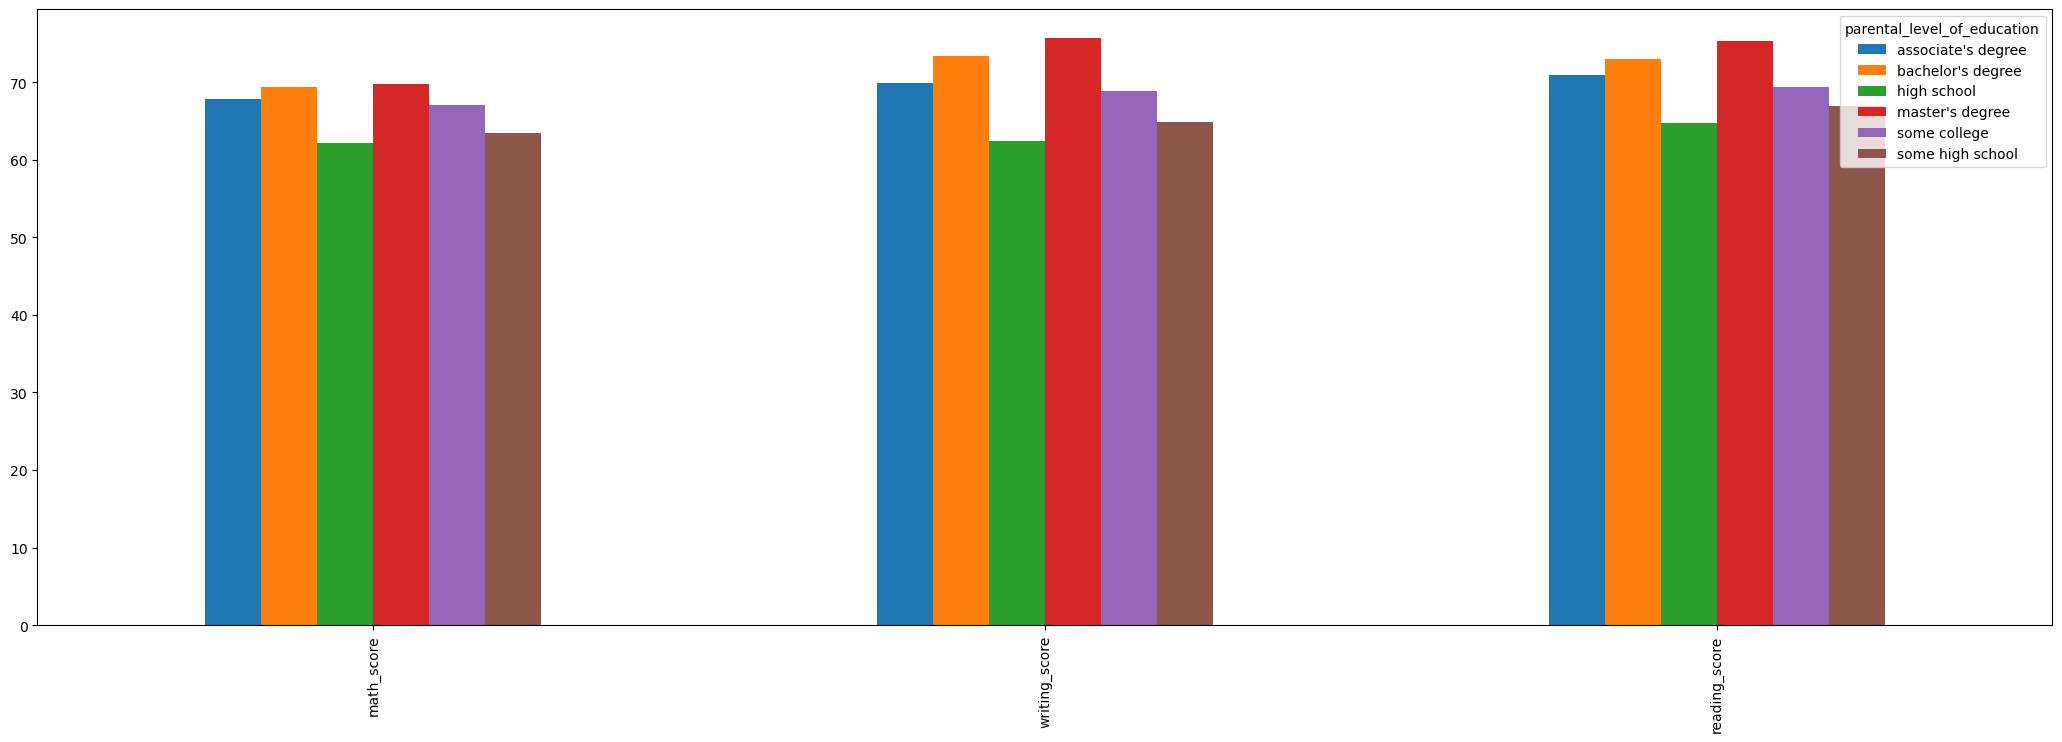

In [50]:
parent_frame.plot(kind='bar',figsize=(26,8))
plt.show()

<Axes: xlabel='lunch', ylabel='writing_score'>

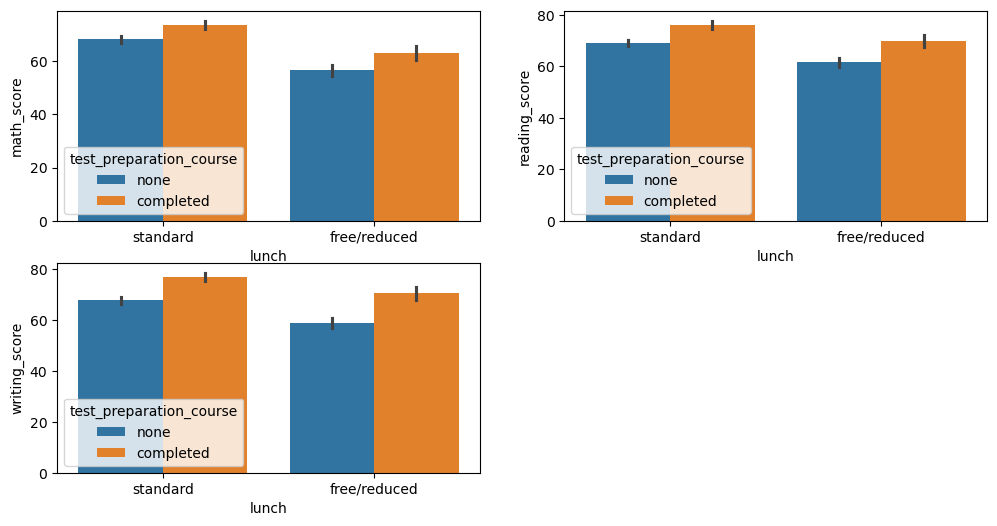

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])